In [1]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [2]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8824 - loss: 0.3695
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9849 - loss: 0.0476
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9906 - loss: 0.0314
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9934 - loss: 0.0219
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9951 - loss: 0.0151


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'테스트 정확도 : {test_acc:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9878 - loss: 0.0413
테스트 정확도 : 0.991


In [10]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model_no_max_pool.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       619,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 712,202 (2.72 MB)

 Trainable params: 712,202 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
import os, shutil, pathlib

original_dir = pathlib.Path('../data/dogscats/train')
new_base_dir = pathlib.Path('../data/dogscats/dogscats_small')


def make_subset(subset_name, start_index, end_index):
    for category in ('cat', 'dog'):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)


make_subset('train', start_index=0, end_index=1000)
make_subset('validation', start_index=1000, end_index=1500)
make_subset('test', start_index=1500, end_index=2500)

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1. / 255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [20]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train', image_size=(180, 180), batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation', image_size=(180, 180), batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / 'test', image_size=(180, 180), batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [24]:
for data_batch, labels_batch in train_dataset:
    print('데이터 배치 크기 : ', data_batch.shape)
    print('레이블 배치 크기 : ', labels_batch.shape)
    break

데이터 배치 크기 :  (32, 180, 180, 3)
레이블 배치 크기 :  (32,)


In [26]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 553ms/step - accuracy: 0.4961 - loss: 0.6966 - val_accuracy: 0.5060 - val_loss: 0.6923
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 561ms/step - accuracy: 0.5299 - loss: 0.6999 - val_accuracy: 0.5000 - val_loss: 0.6904
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 534ms/step - accuracy: 0.5600 - loss: 0.6841 - val_accuracy: 0.6330 - val_loss: 0.6364
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 500ms/step - accuracy: 0.6422 - loss: 0.7247 - val_accuracy: 0.5920 - val_loss: 0.7696
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 501ms/step - accuracy: 0.6342 - loss: 0.6284 - val_accuracy: 0.6480 - val_loss: 0.6254
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 492ms/step - accuracy: 0.7063 - loss: 0.5719 - val_accuracy: 0.6510 - val_loss: 0.6264
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 496ms/step - accuracy: 0.7175 - loss: 0.5649 - val_accuracy: 0.6880 - val_loss: 0.5722
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 493ms/step - accuracy: 0.7410 - loss: 0.5044 - val_accu

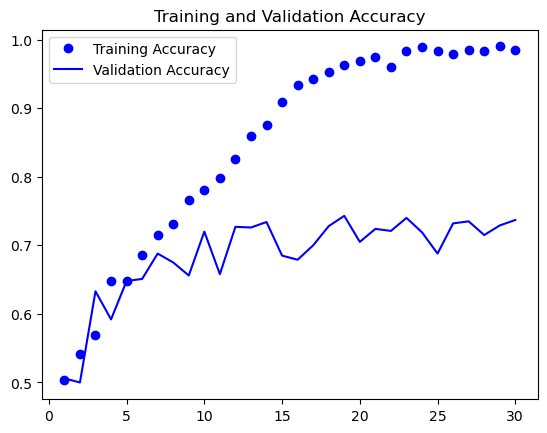

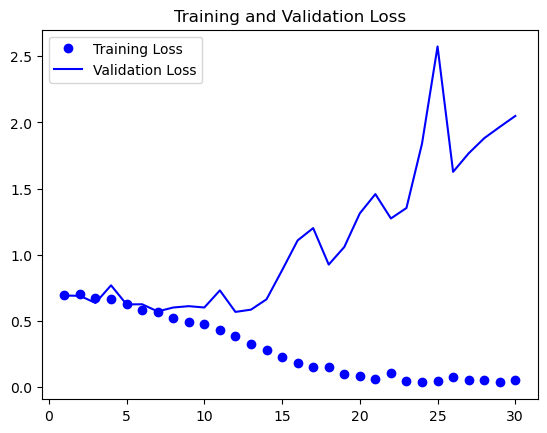

In [27]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [28]:
test_model = keras.models.load_model('convnet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.3f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.7266 - loss: 0.5950
테스트 정확도 : 0.720


In [29]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

2024-08-16 15:42:12.616384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


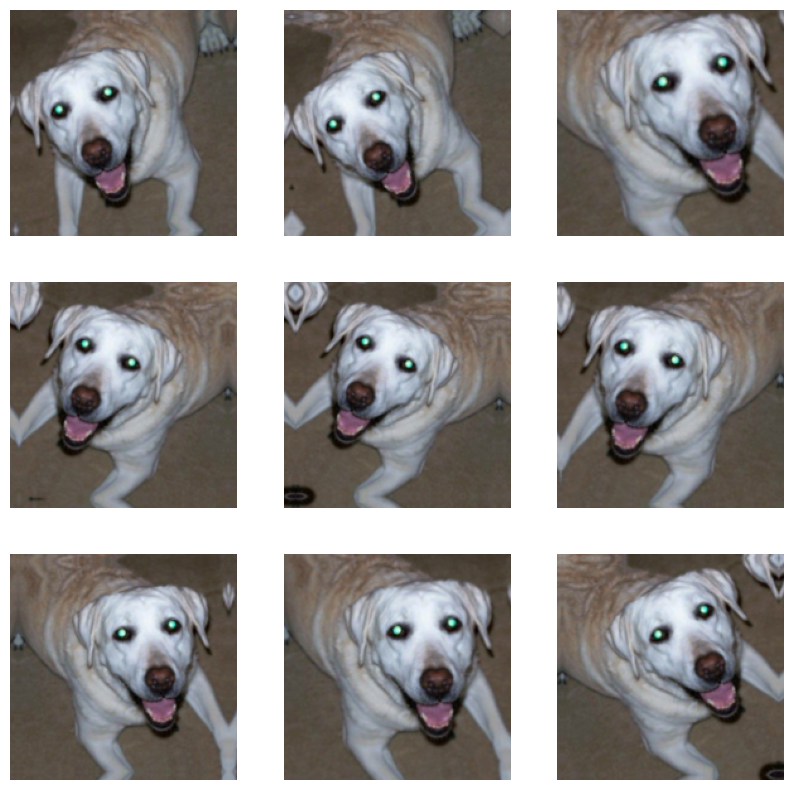

In [30]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis('off')

In [31]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1. / 255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch_with_augmentation.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]
history = model.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 556ms/step - accuracy: 0.5249 - loss: 0.7246 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 593ms/step - accuracy: 0.5032 - loss: 0.6963 - val_accuracy: 0.5030 - val_loss: 0.6927
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 547ms/step - accuracy: 0.5228 - loss: 0.6963 - val_accuracy: 0.5050 - val_loss: 0.6918
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 528ms/step - accuracy: 0.5276 - loss: 0.6938 - val_accuracy: 0.6180 - val_loss: 0.6701
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 519ms/step - accuracy: 0.5705 - loss: 0.6816 - val_accuracy: 0.6190 - val_loss: 0.6464
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 521ms/step - accuracy: 0.6308 - loss: 0.6511 - val_accuracy: 0.6120 - val_loss: 0.6522
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 528ms/step - accuracy: 0.6180 - loss: 0.6482 - val_accuracy: 0.6140 - val_loss: 0.6514
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 526ms/step - accuracy: 0.6573 - loss: 0.6316 - 

In [34]:
test_model = keras.models.load_model('convnet_from_scratch_with_augmentation.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print('테스트 정확도 : {test_acc:.3f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - accuracy: 0.8143 - loss: 0.4536
테스트 정확도 : {test_acc:.3f}


In [35]:
conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

In [36]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
import numpy as np


def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.application.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)


train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

AttributeError: module 'keras._tf_keras.keras' has no attribute 'application'

In [38]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='feature_extraction.keras', save_best_only=True, monitor='val_loss'
    )
]
history = model.fit(train_features, train_labels, epochs=20,
                    validation_data=(val_features, val_labels), callbacks=callbacks)

NameError: name 'train_features' is not defined

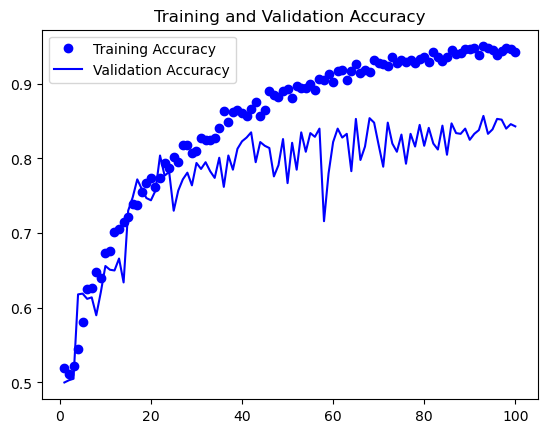

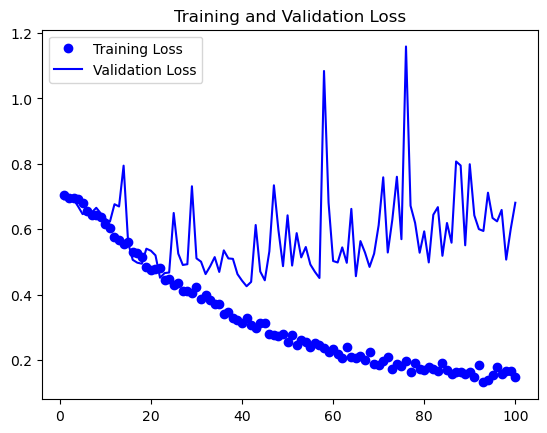

In [39]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [40]:
conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False)
conv_base.trainable = False

In [41]:
conv_base.trainable = True
print('합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수 : ', len(conv_base.trainable_weights))

합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수 :  26


In [42]:
conv_base.trainable = False
print('합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수 : ', len(conv_base.trainable_weights))

합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수 :  0


In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='feature_extraction_with_data_augmentation.keras', save_best_only=True, monitor='val_loss'
    )
]
history = model.fit(train_features, train_labels, epochs=50, validation_data=validation_dataset, callbacks=callbacks)

NameError: name 'train_features' is not defined

In [44]:
test_model = keras.models.load_model('feature_extraction_with_data_augmentation.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.3f}')

ValueError: File not found: filepath=feature_extraction_with_data_augmentation.keras. Please ensure the file is an accessible `.keras` zip file.

In [45]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [46]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


ValueError: Input 0 of layer "functional_8" is incompatible with the layer: expected shape=(None, 5, 5, 512), found shape=(None, 180, 180, 3)

In [47]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

ValueError: File not found: filepath=fine_tuning.keras. Please ensure the file is an accessible `.keras` zip file.